<a href="https://colab.research.google.com/github/Ashugujjar3/Document-Similarity-Finder/blob/main/Document_Similarity_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For text preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 1. Prepare the Dataset

In [13]:
data = [
    "The stock market crashed yesterday due to economic uncertainty.",
    "Yesterday, the economy faced a downturn as the stock market fell.",
    "A new species of bird was discovered in the Amazon rainforest.",
    "Scientists have discovered a rare bird in the Amazon jungle.",
    "The local football team won their match in a thrilling game.",
    "A major earthquake struck the city, causing widespread damage.",
    "The government announced a new policy to improve education standards.",
    "Technology companies are investing heavily in artificial intelligence research.",
    "A famous actor won the best performance award at the ceremony.",
    "The new cafe downtown serves delicious coffee and pastries.",
    "Researchers found a potential cure for a rare disease in recent trials.",
    "The local basketball team lost the championship in the final seconds.",
    "A large wildfire has spread across the northern forest region.",
    "Students protested for climate change action outside the parliament.",
    "A music festival attracted thousands of fans from across the country."
]

# Create a DataFrame
df = pd.DataFrame({"doc_id": range(1, len(data)+1), "text": data})
df.to_csv("documents.csv", index=False)
df.head()


,doc_id,text
0,1,The stock market crashed yesterday due to econ...
1,2,"Yesterday, the economy faced a downturn as the..."
2,3,A new species of bird was discovered in the Am...
3,4,Scientists have discovered a rare bird in the ...
4,5,The local football team won their match in a t...


## 2. Preprocess the Text

In [14]:
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in STOPWORDS]
    return " ".join(words)

df['clean_text'] = df['text'].apply(preprocess)
df.head()


,doc_id,text,clean_text
0,1,The stock market crashed yesterday due to econ...,stock market crashed yesterday due economic un...
1,2,"Yesterday, the economy faced a downturn as the...",yesterday economy faced downturn stock market ...
2,3,A new species of bird was discovered in the Am...,new specie bird discovered amazon rainforest
3,4,Scientists have discovered a rare bird in the ...,scientist discovered rare bird amazon jungle
4,5,The local football team won their match in a t...,local football team match thrilling game


## 3. TF-IDF Vectorization

In [19]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
print(f"\n--- TF-IDF matrix created with shape: {tfidf_matrix.shape} ---")


--- TF-IDF matrix created with shape: (15, 90) ---


## 4. Compute Cosine Similarity

In [16]:
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim, index=df['doc_id'], columns=df['doc_id'])
cos_sim_df


doc_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
doc_id,,,,,,,,,,,,,,,
1,1.000000,0.361226,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.361226,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,1.000000,0.458020,0.000000,0.0,0.105995,0.0,0.0,0.105995,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.458020,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.120901,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.251872,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.105995,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.090976,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


## 5. Visualize Similarity Matrix (Heatmap)

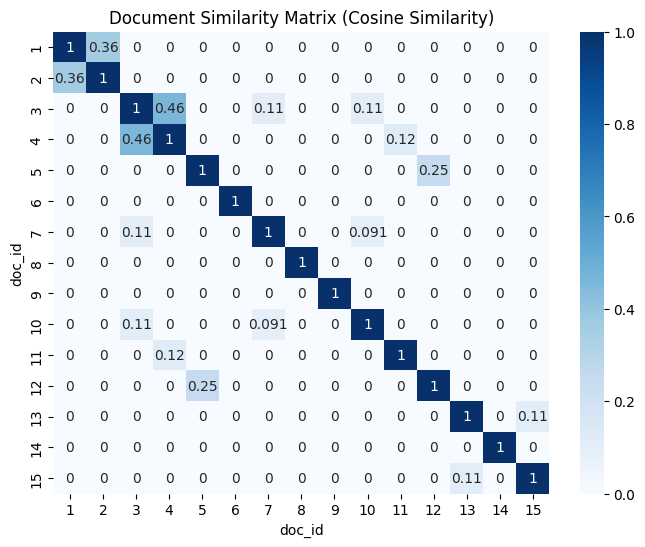

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(cos_sim_df, annot=True, cmap="Blues")
plt.title("Document Similarity Matrix (Cosine Similarity)")
plt.show()


## 6. Find Top 3 Most Similar Pairs

In [18]:
# Mask diagonal (self-similarity)
cos_sim_no_diag = cos_sim.copy()
np.fill_diagonal(cos_sim_no_diag, 0)

# Find top 3 pairs
top_indices = np.unravel_index(np.argsort(cos_sim_no_diag.ravel())[-3:], cos_sim_no_diag.shape)
top_pairs = [(df['doc_id'][i], df['doc_id'][j], cos_sim_no_diag[i,j]) for i,j in zip(*top_indices)]
top_pairs = sorted(top_pairs, key=lambda x: x[2], reverse=True)

print("Top 3 most similar document pairs:")
for pair in top_pairs:
    print(f"Document {pair[0]} & Document {pair[1]} → Similarity: {pair[2]:.4f}")


Top 3 most similar document pairs:
Document 3 & Document 4 → Similarity: 0.4580
Document 4 & Document 3 → Similarity: 0.4580
Document 1 & Document 2 → Similarity: 0.3612
